In [2]:
%pip install --user --upgrade "opencv-python"
%pip install --upgrade wget
%pip install --upgrade pytesseract

import wget
import cv2 
import time
import threading
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os
import image_utils

Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: pytesseract
    Found existing installation: pytesseract 0.3.9
 

In [3]:
purple = (200, 0, 200)
plt.rcParams['figure.dpi'] = 150
print(datetime.today())

2022-08-25 12:21:21.116689




test-images/IMG1428high.jpg
Start Time: 1661445134.27
Image Size: 6921200. Ratio of std color counts to size: 4.30.
Image type: digital_pic
Tesseract config: --psm 10 --oem 1 -l eng -c tessedit_char_whitelist=123456789 --tessdata-dir ./tessdata/4.00_Sept_2017

Image width: 2600
Image height: 2662
Minimum side: 2600
Minimum line length: 1300
Max line gap: 52

Threshold: 1300
Horizontal lines: 134
Vertical lines: 185
Rejected lines: 78
x coords before refactoring: [[85, 332], [346, 603], [616, 874], [897, 1153], [1165, 1250], [1254, 1256], [1260, 1262], [1265, 1269], [1271, 1310], [1312, 1321], [1325, 1327], [1330, 1333], [1344, 1345], [1347, 1351], [1354, 1429], [1443, 1704], [1726, 1987], [2002, 2268], [2284, 2548]]
y coords before refactoring: [[87, 351], [361, 635], [647, 916], [938, 1199], [1212, 1476], [1488, 1746], [1767, 2029], [2038, 2286], [2300, 2553], [2569, 2571], [2574, 2575]]
Refactor y coordinates
Coordinate widths histogram for refactoring:
(array([2, 0, 0, 0, 0, 0, 0,

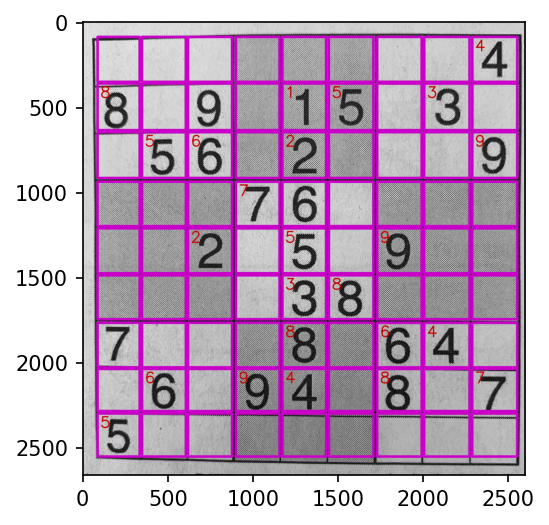

In [7]:
IMAGE = 'test-images/IMG1428high.jpg'
full_file_path = os.path.join(os.getcwd(), IMAGE)
matrix_image = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
if matrix_image is None:
    print('File \'%s\' is not an image.' % IMAGE)
else:
    print('\n\n%s' % IMAGE)
    input_matrix, image_with_ocr, image_with_lines, coordinates = image_utils.extract_matrix_from_image(matrix_image)
    image_utils.show_image(image_with_ocr)


Image width: 1129
Image height: 1162
Minimum side: 1129
Minimum line length: 564
Max line gap: 22

Threshold: 564
Horizontal lines: 59
Vertical lines: 50
Rejected lines: 85
x coords before refactoring: [[18, 23], [28, 140], [144, 269], [271, 337], [341, 386], [395, 439], [441, 508], [513, 552], [554, 581], [583, 585], [590, 628], [633, 746], [756, 870], [873, 991], [995, 1109]]
y coords before refactoring: [[23, 141], [147, 266], [271, 389], [397, 513], [519, 635], [642, 761], [771, 889], [895, 1013], [1018, 1134]]
Refactor y coordinates
Coordinate widths histogram for refactoring:
(array([3, 0, 0, 0, 0, 0, 4, 0, 0, 2]), array([116. , 116.3, 116.6, 116.9, 117.2, 117.5, 117.8, 118.1, 118.4,
       118.7, 119. ]))
Min width: 100.13, Max width: 129.91
Refactor x coordinates
Coordinate widths histogram for refactoring:
(array([2, 0, 2, 3, 0, 2, 0, 0, 1, 5]), array([  2. ,  14.3,  26.6,  38.9,  51.2,  63.5,  75.8,  88.1, 100.4,
       112.7, 125. ]))
Min width: 85.34, Max width: 137.5
x co

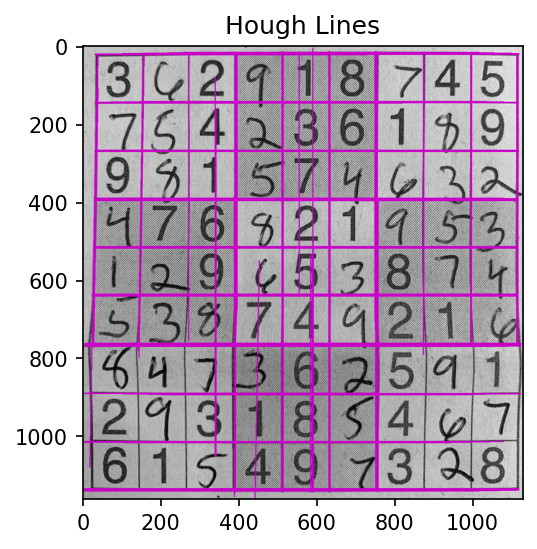

In [5]:
x_coords, y_coords, lines = image_utils.get_cell_boundaries(matrix_image)
image_with_lines = image_utils.generate_image_with_lines(matrix_image, lines[0]+lines[1], purple)
image_utils.show_image(image_with_lines, title='Hough Lines')